# Planteamiento del proyecto

Tu departamento de Recursos Humanos quiere prevenir el estrés de los empleados dentro de la compañía. Para ello, lo principal es detectar el nivel de estrés de estos.

Se te pide desarrollar una solución que indique el nivel de estrés de un empleado que responda a un cuestionario. Estos niveles de estrés pueden ser: no estresado (0-3), estresado (3-6), extremadamente estresado (7-8).

El dataset a utilizar es el que aparece en la carpeta: [Sleep health and lifestyle dataset](./Sleep_health_and_lifestyle_dataset.csv)

Objetivos a cumplir:
1. Seleccionar un algoritmo que pueda devolver el nivel de estrés de la persona (0-8).
2. Determinar qué variables son las que más información dan al nivel de estrés de una persona.
3. Clasificar los resultados del algoritmo en las 3 categorías que piden en RR.HH.

Variables del dataset:
- ***Person ID:*** Identificador individual.
- ***Gender:*** Género (Male/Female).
- ***Age:*** Edad
- ***Occupation:*** Ocupación Profesional.
- ***Sleep Duration (hours):*** Número de horas que duerme la persona al día.
- ***Quality of Sleep (scale: 1-10):*** Rango subjetivo de la calidad del sueño, valores del 1 al 10.
- ***Physical Activity Level (minutes/day):*** El número de minutos que la persona realiza actividad física diariamente..
- ***Stress Level (scale: 1-10):*** Una calificación subjetiva del nivel de estrés experimentado por la persona, que va del 1 al 10.
- ***BMI Category:*** La categoría de IMC de la persona (por ejemplo, bajo peso, normal, sobrepeso).
- ***Blood Pressure (systolic/diastolic):*** La medición de la presión arterial de la persona, indicada como presión sistólica sobre presión diastólica.
- ***Heart Rate (bpm):*** La frecuencia cardíaca en reposo de la persona en latidos por minuto.
- ***Daily Steps:*** El número de pasos que da la persona por día.
- ***Sleep Disorder:*** La presencia o ausencia de un trastorno del sueño en la persona (Ninguno, Insomnio, Apnea del sueño).

In [106]:
# Importación de algunas librerías
import pandas as pd 

rn_state = 42

## 1. Primer contacto con los datos

En este apartado cargaremos los datos y realizaremos una exploración de los mismos.

### 1.1. Carga de los datos

Cargaremos los datos en un dataframe de pandas.

In [107]:
df_estres = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df_estres.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### 1.2. Limpieza de los datos

En este apartado realizaremos una limpieza de los datos.
- Obtenemos información del dataset.
- Sacamos los parámetros estadísticos más relevantes de las variables
- Identificamos y eliminamos los valores nulos y duplicados.
- Realizamos una transformación de variables para que sean más fáciles de analizar, si es necesario.
- Eliminamos las variables que no aportan ninguna información relevante.

In [108]:
# Mostramos información de los datos
df_estres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [109]:
# Hacemos un resumen de las métricas estadísticas más relevantes de los datos
df_estres.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [110]:
# Vemos la cantidad de valores NaN que hay
df_estres.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [111]:
# Vemos el porcentaje de valores NaN
round(df_estres.isnull().sum()/len(df_estres)*100, 2)

Person ID                   0.00
Gender                      0.00
Age                         0.00
Occupation                  0.00
Sleep Duration              0.00
Quality of Sleep            0.00
Physical Activity Level     0.00
Stress Level                0.00
BMI Category                0.00
Blood Pressure              0.00
Heart Rate                  0.00
Daily Steps                 0.00
Sleep Disorder             58.56
dtype: float64

En *Sleep Disorder* tenemos muchos casos de valores NaN, veamos esa variable más en profundidad.

In [112]:
df_estres['Sleep Disorder'].value_counts(dropna=False)

Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Como podemos observar solo hay 3 posibles valores. Siguiendo la descripción de las variables del dataset, estos valores NaN representan que no hay ningun desorden del sueño. No son valores perdidos como tal.

In [113]:
df_estres['Sleep Disorder'] = df_estres['Sleep Disorder'].fillna('No Disorder')
df_estres['Sleep Disorder'].value_counts(dropna=False)

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [114]:
# Vemos la cantidad de valores duplicados que hay
df_estres.duplicated().sum()

0

Una vez visto tanto valores perdidos como valores duplicados, voy a eliminar la o las variables que no creo que sean relevantes para el problema. 

In [115]:
df_estres_clean = df_estres.drop(columns='Person ID')
df_estres_clean.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Miramos la ocupación un poco más de cerca porque salen muchas ocupaciones.

In [116]:
df_estres_clean['Occupation'].value_counts(dropna=False)

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Vamos a agrupar las ocupaciones por categoría profesional: 

**Salud**
- Nurse
- Doctor

**Ingeniería y Tecnología**
- Engineer
- Software Engineer
- Scientist

**Legal y Administrativo**
- Lawyer
- Accountant

**Educación**
- Teacher

**Ventas y Gestión**
- Salesperson
- Sales Representative
- Manager

Con esto conseguimos reducir la cantidad de ocupaciones a 5 en vez de 11.

In [117]:
# Definir una función para categorizar las ocupaciones
def categorize_occupation(occupation):
    if occupation in ['Nurse', 'Doctor']:
        return 'Health'
    elif occupation in ['Engineer', 'Software Engineer', 'Scientist']:
        return 'Engineering and Technology'
    elif occupation in ['Lawyer', 'Accountant']:
        return 'Legal and Administrative'
    elif occupation == 'Teacher':
        return 'Education'
    elif occupation in ['Salesperson', 'Sales Representative', 'Manager']:
        return 'Sales and Management'
    else:
        return 'Other'

In [118]:
df_estres_clean['Occupation_cat'] = df_estres_clean['Occupation'].apply(categorize_occupation)
df_estres_clean.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_cat
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,Engineering and Technology
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,Health
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,Health
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Sales and Management
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Sales and Management


In [119]:
df_estres_clean['Occupation_cat'].value_counts(dropna=False)

Occupation_cat
Health                        144
Legal and Administrative       84
Engineering and Technology     71
Education                      40
Sales and Management           35
Name: count, dtype: int64

Con esto ya podemos eliminar la columna de *Occupation*.

In [120]:
df_estres_clean = df_estres_clean.drop(columns='Occupation')
df_estres_clean.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_cat
0,Male,27,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,Engineering and Technology
1,Male,28,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,Health
2,Male,28,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,Health
3,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Sales and Management
4,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Sales and Management


En cuanto a cambios solo nos falta pasar a float la varaible *Blood Pressure*.

In [121]:
df_estres_clean['Blood Pressure'] = df_estres_clean['Blood Pressure'].apply(lambda x: round(eval(x), 2))
df_estres_clean.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_cat
0,Male,27,6.1,6,42,6,Overweight,1.52,77,4200,No Disorder,Engineering and Technology
1,Male,28,6.2,6,60,8,Normal,1.56,75,10000,No Disorder,Health
2,Male,28,6.2,6,60,8,Normal,1.56,75,10000,No Disorder,Health
3,Male,28,5.9,4,30,8,Obese,1.56,85,3000,Sleep Apnea,Sales and Management
4,Male,28,5.9,4,30,8,Obese,1.56,85,3000,Sleep Apnea,Sales and Management


### 1.3. EDA 

En esta etapa vamos a realizar un análisis más exaustivo de las variables.
- Veremos la distribución de las variables numéricas.
- Veremos la relación entre las variables numéricas y categóricas.
- Veremos la relación entre las variables categóricas.

#### 1.3.1. Distribución de las variables numéricas

En este apartado vamos a ver la distribución de las variables numéricas.

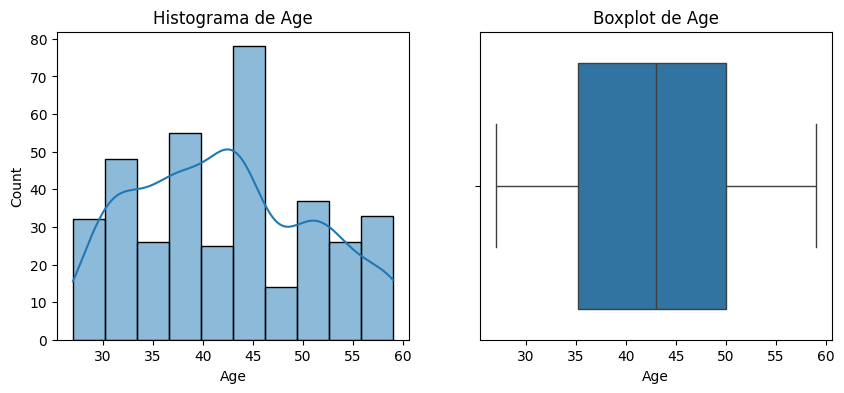

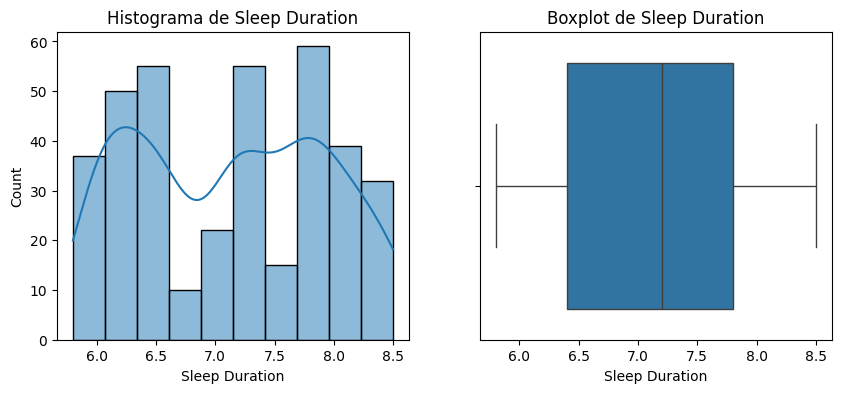

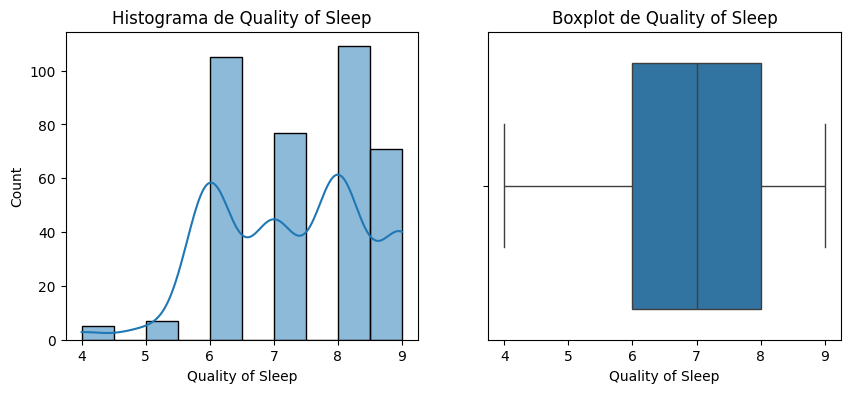

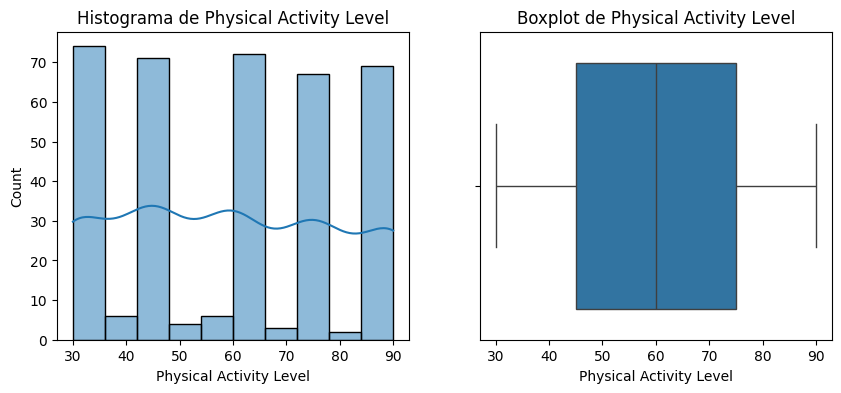

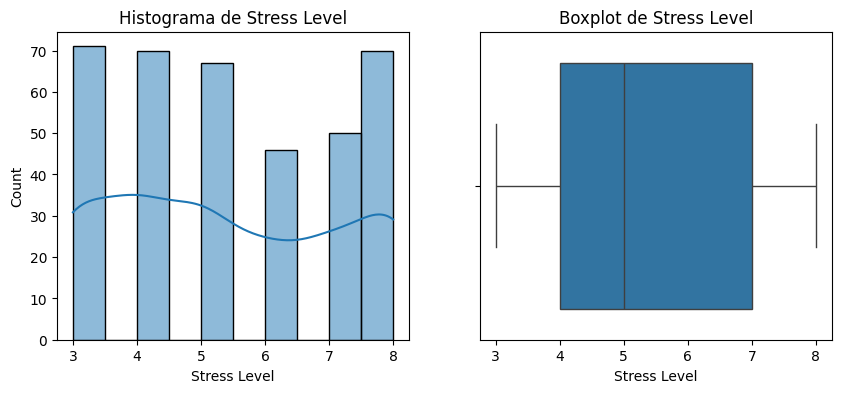

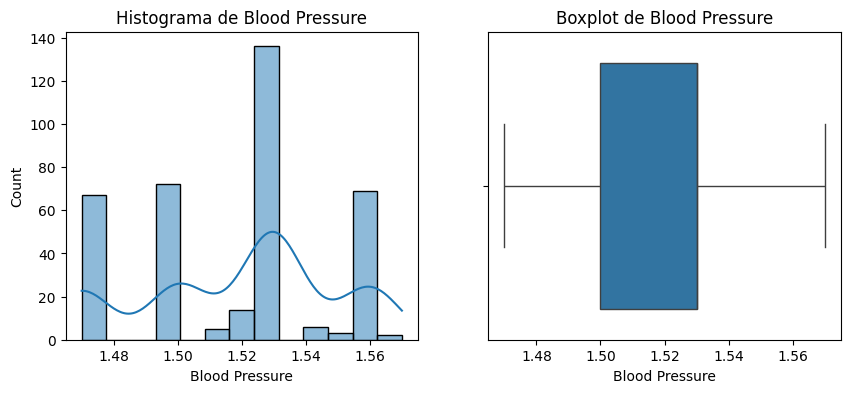

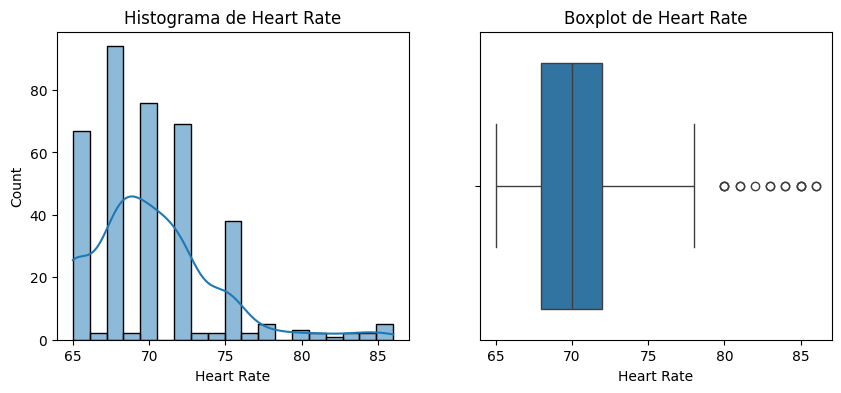

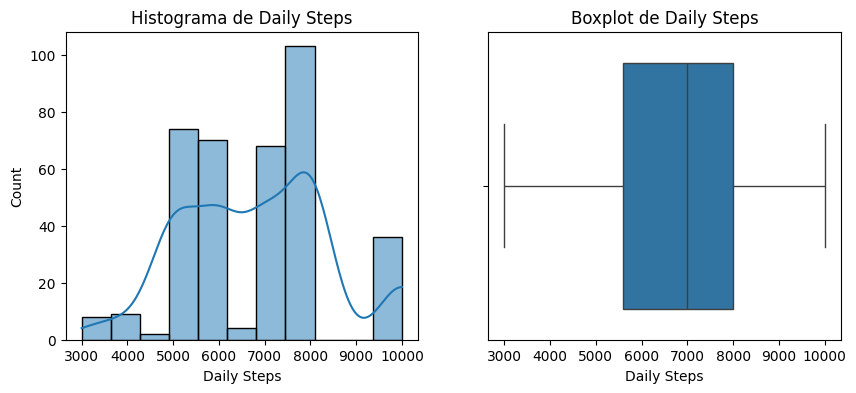

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ver la distribución de las variables numéricas
def plot_numeric_distribution(df):
    numeric_columns = df.select_dtypes(include='number').columns
    for column in numeric_columns:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histograma de {column}')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot de {column}')
        plt.show()

plot_numeric_distribution(df_estres_clean)   

#### 1.3.2. Relación entre las variables numéricas y categóricas

En este apartado vamos a ver la relación entre las variables numéricas y categóricas.

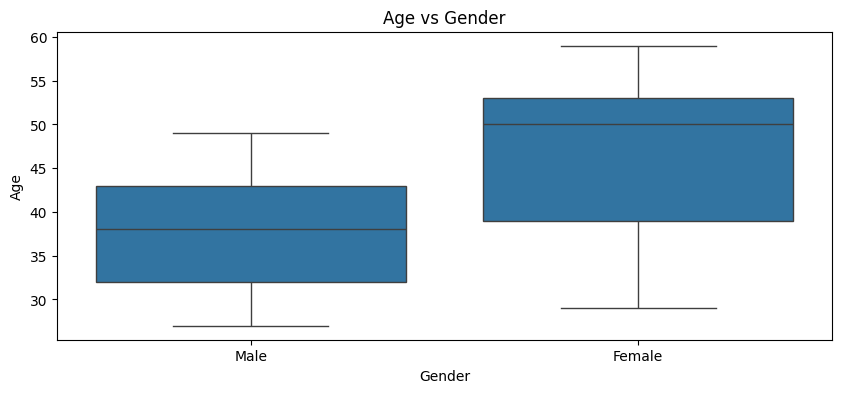

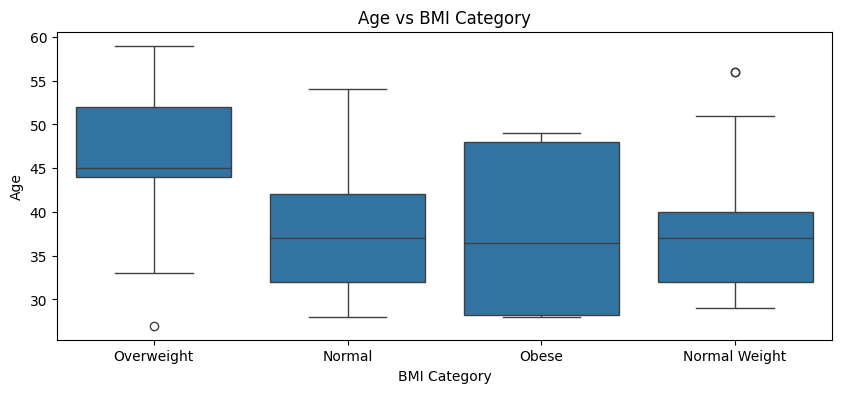

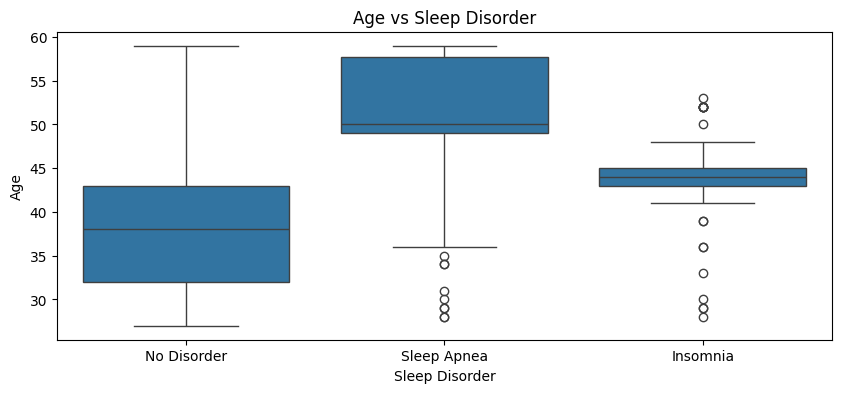

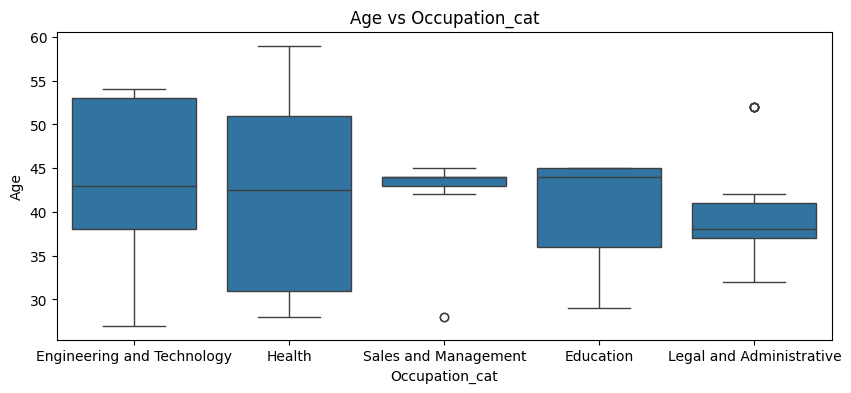

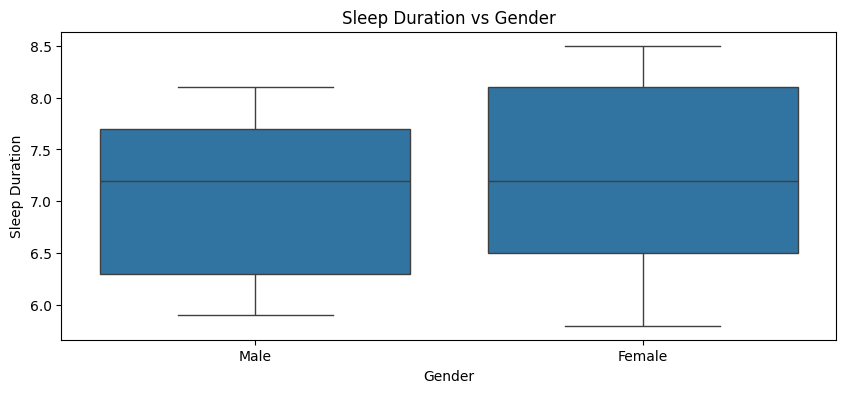

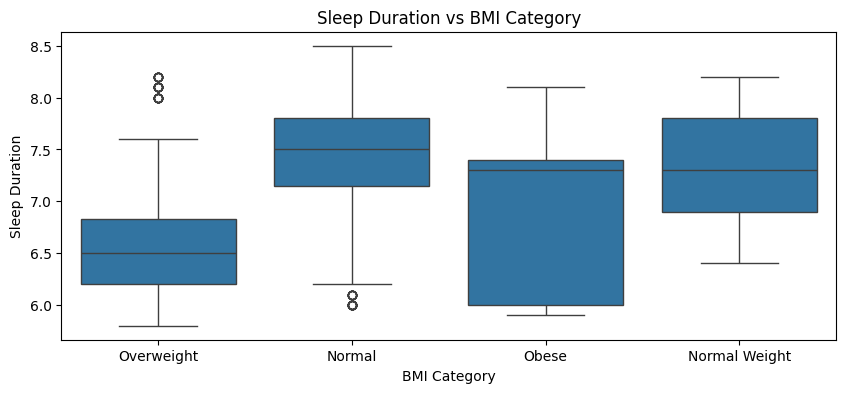

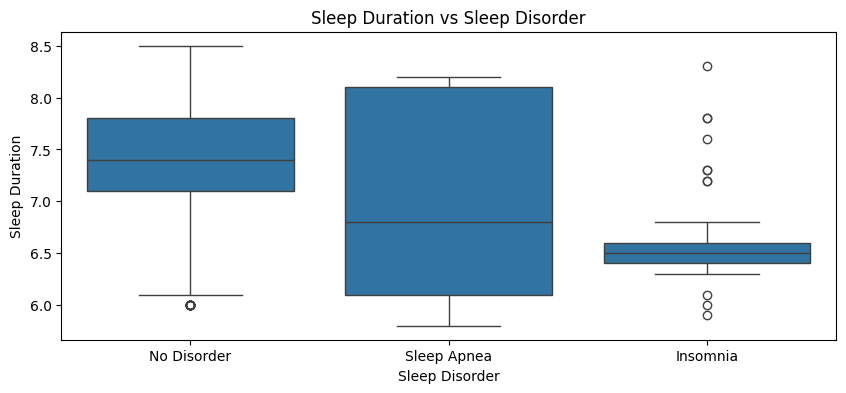

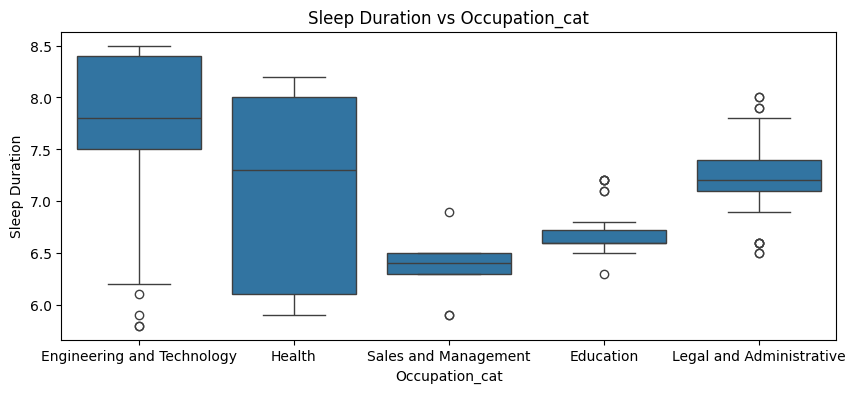

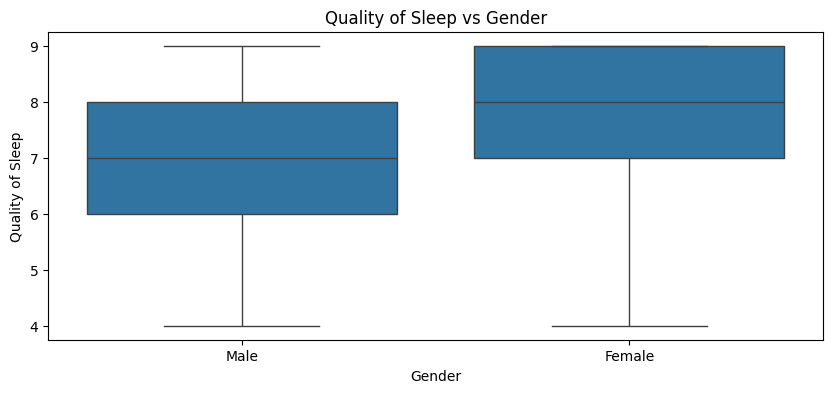

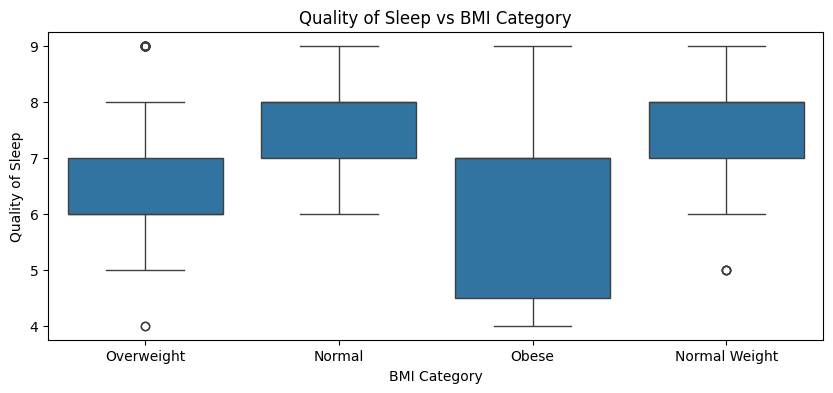

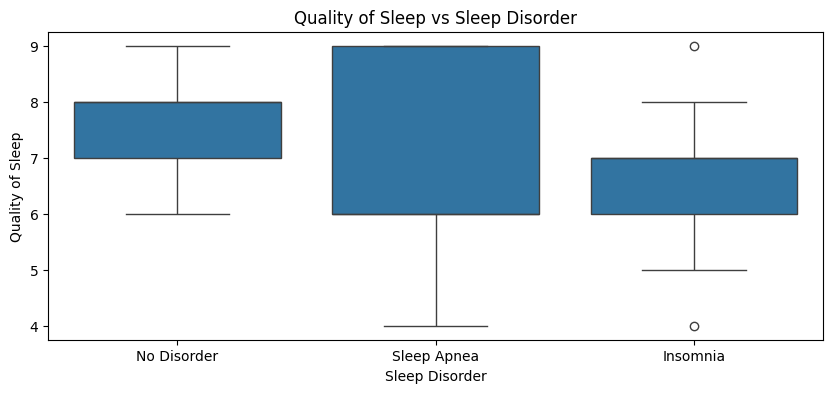

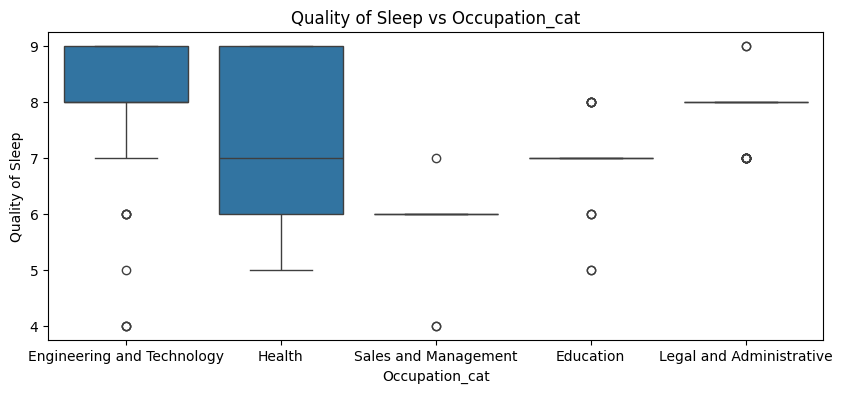

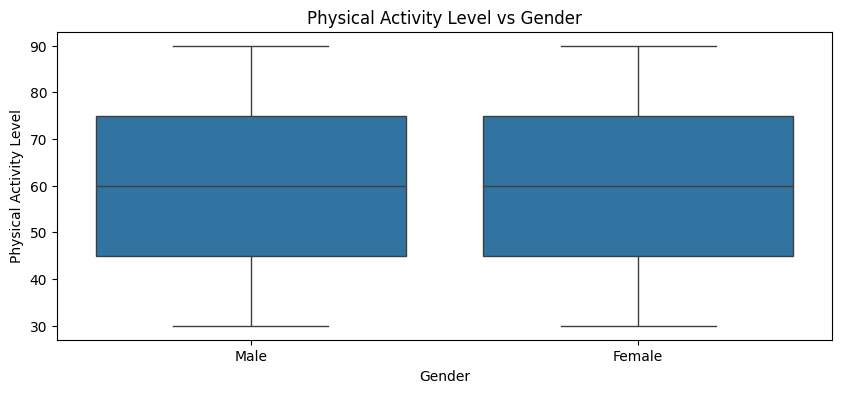

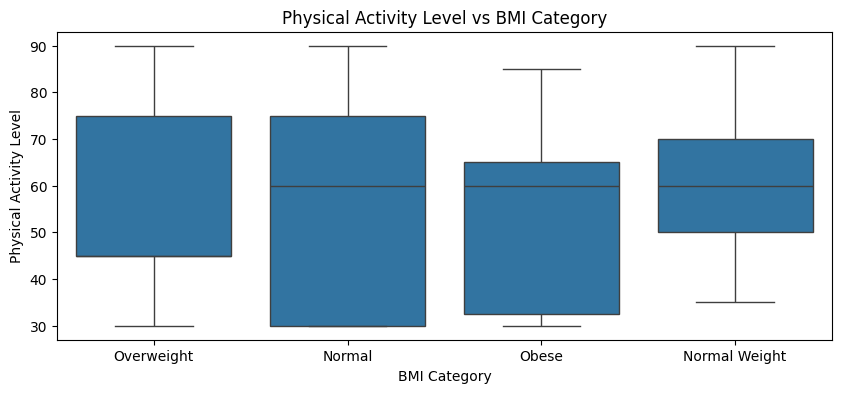

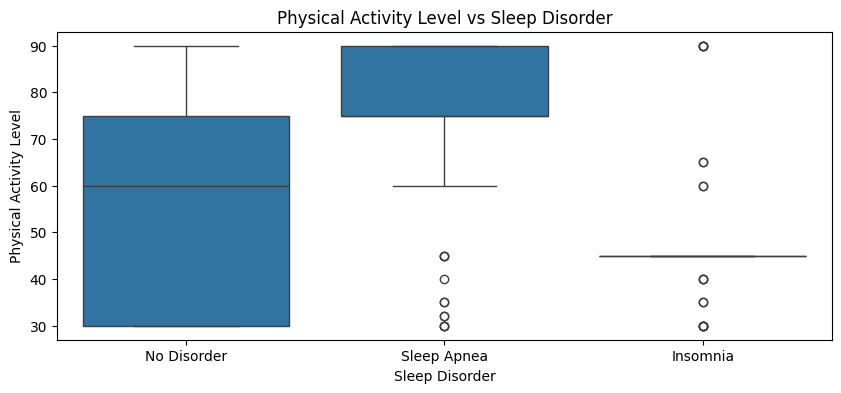

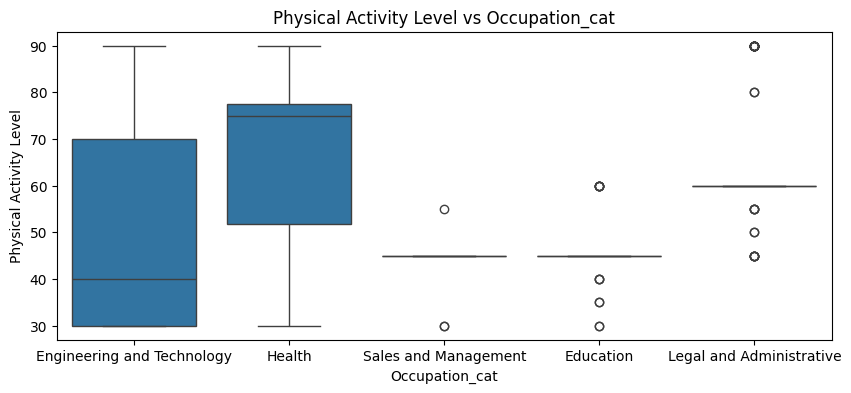

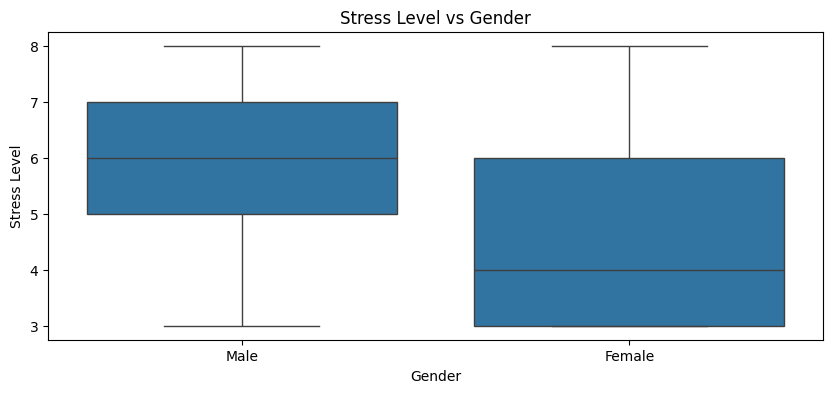

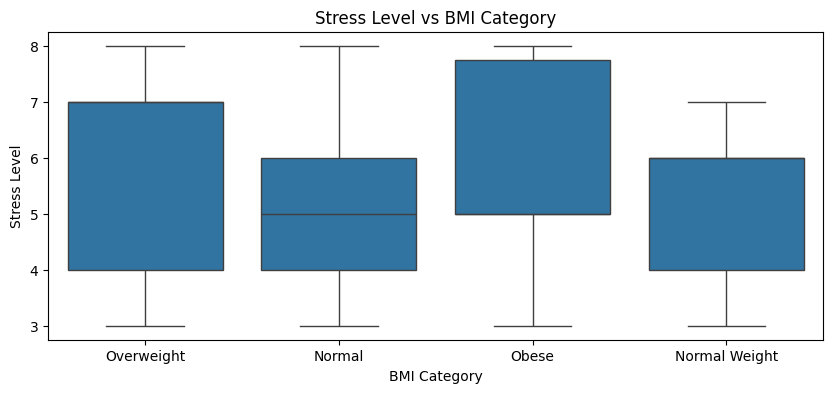

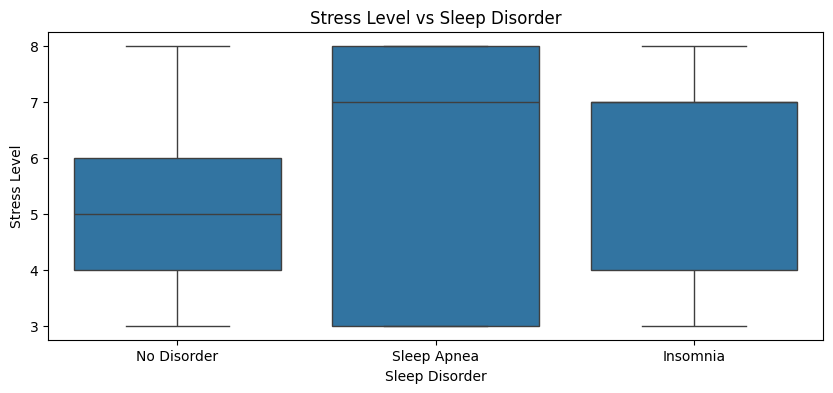

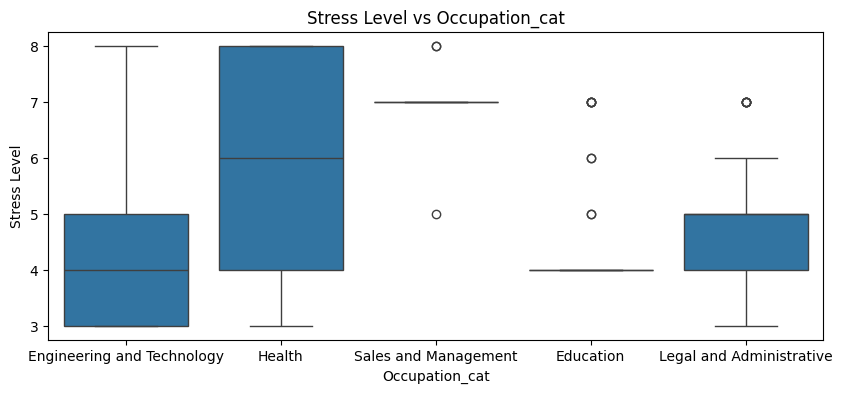

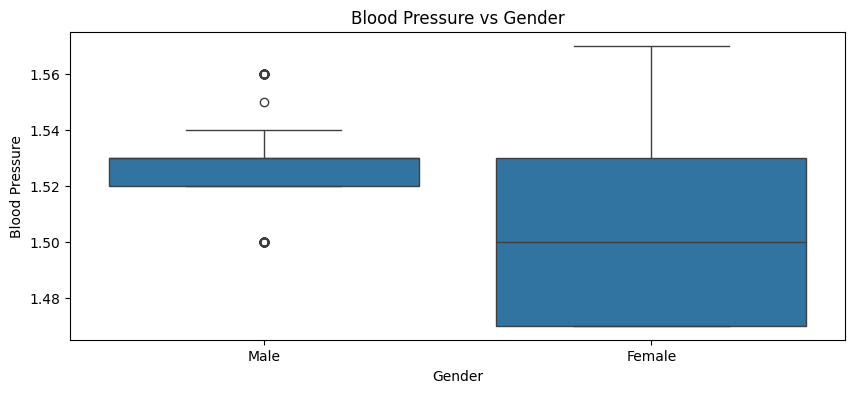

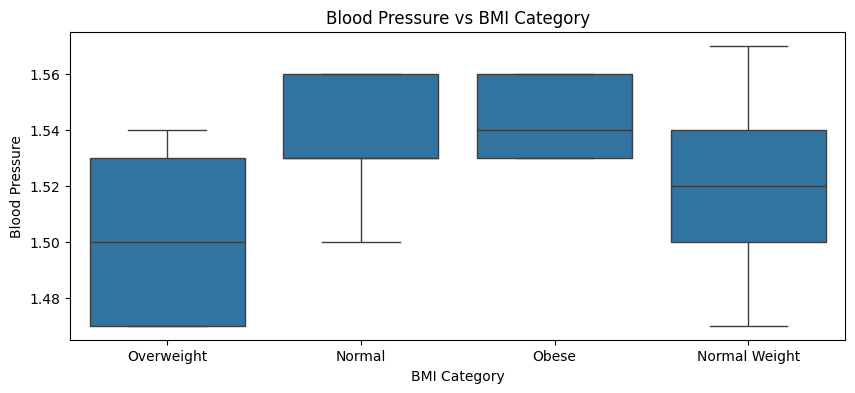

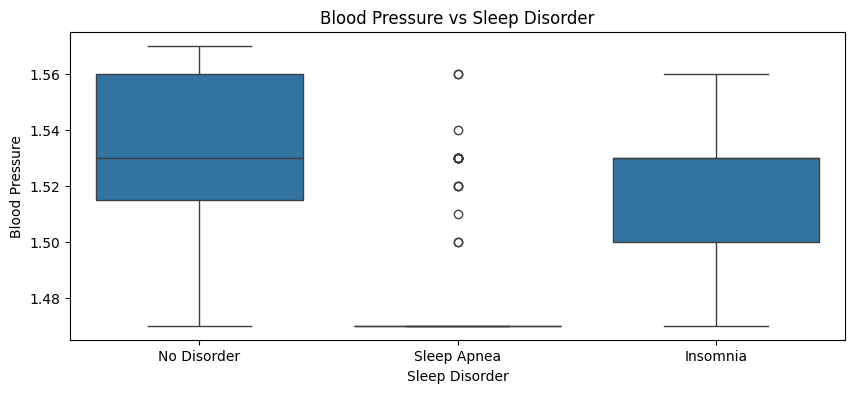

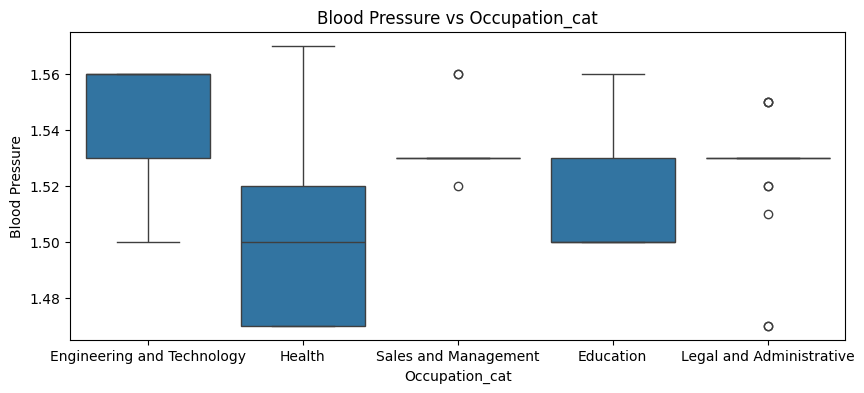

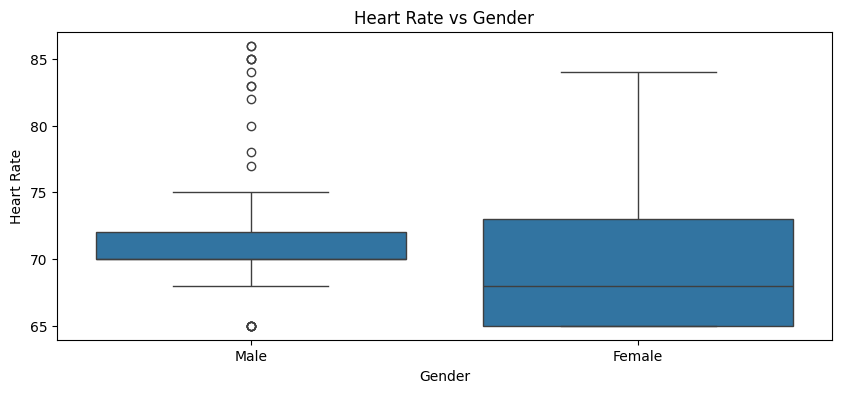

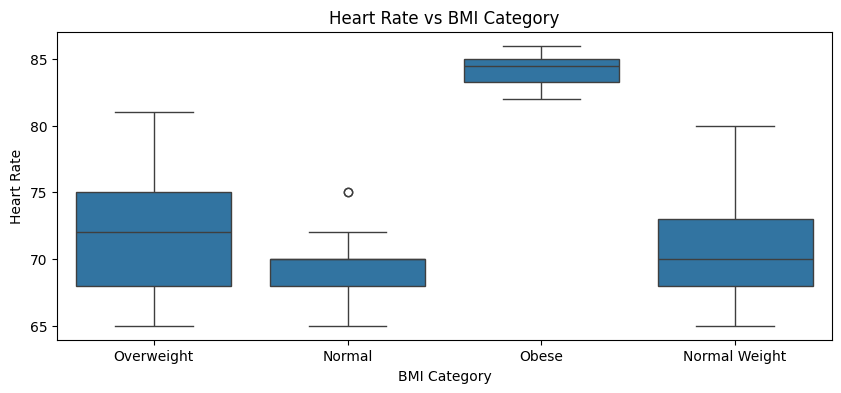

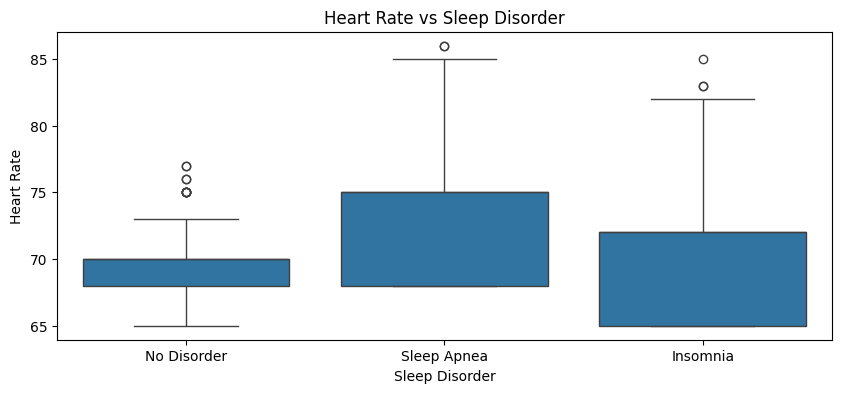

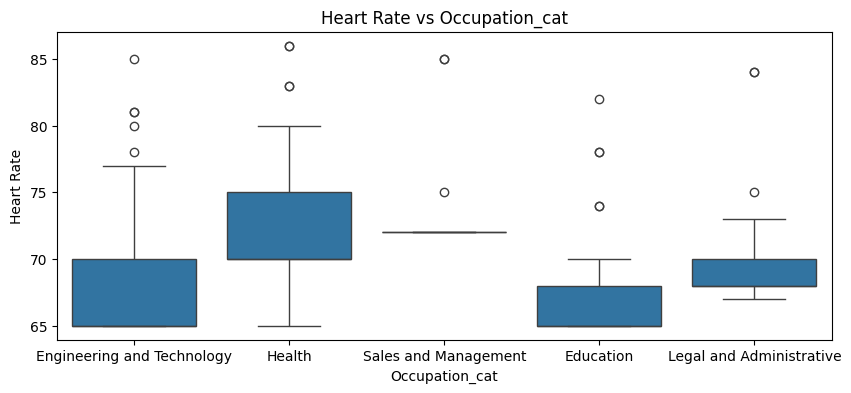

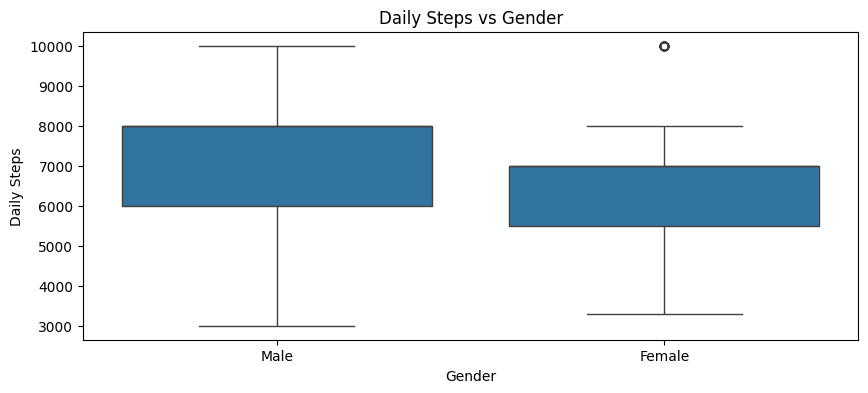

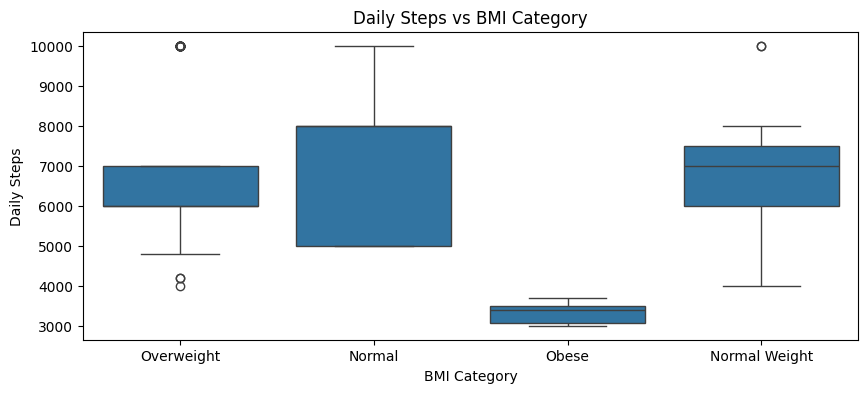

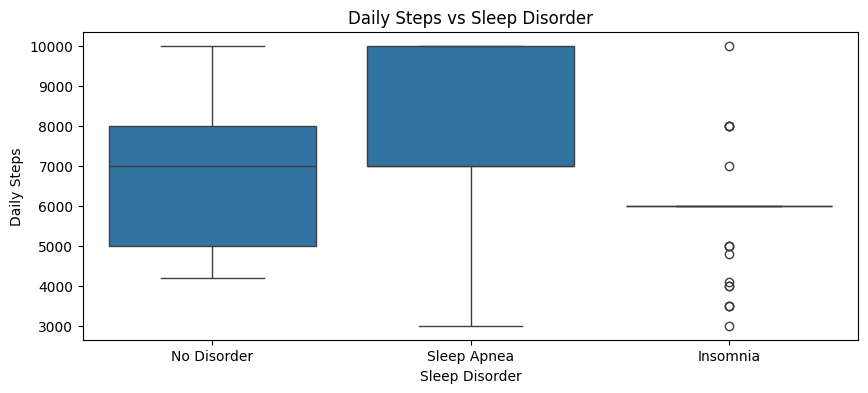

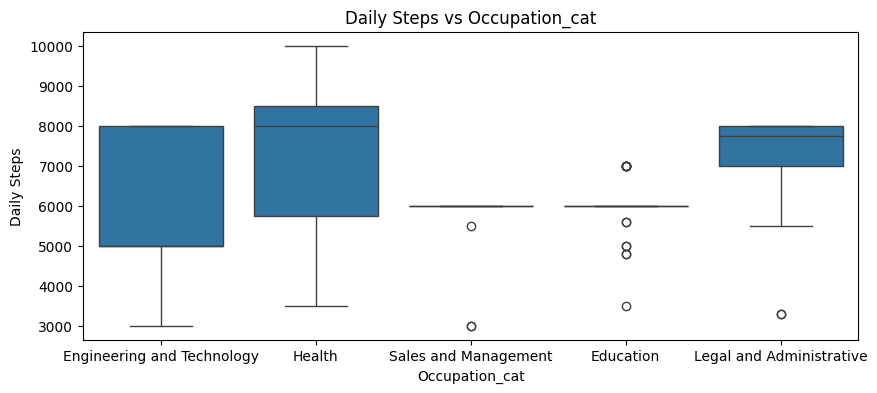

In [123]:
# Ver la relación entre las variables numéricas y categóricas
def plot_num_vs_cat(df):
    numeric_columns = df.select_dtypes(include='number').columns
    categorical_columns = df.select_dtypes(include='object').columns
    for num_col in numeric_columns:
        for cat_col in categorical_columns:
            plt.figure(figsize=(10, 4))
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(f'{num_col} vs {cat_col}')
            plt.show()
            
plot_num_vs_cat(df_estres_clean)

#### 1.3.3. Relación entre las variables categóricas

En este apartado vamos a ver la relación entre las variables categóricas.

<Figure size 1000x400 with 0 Axes>

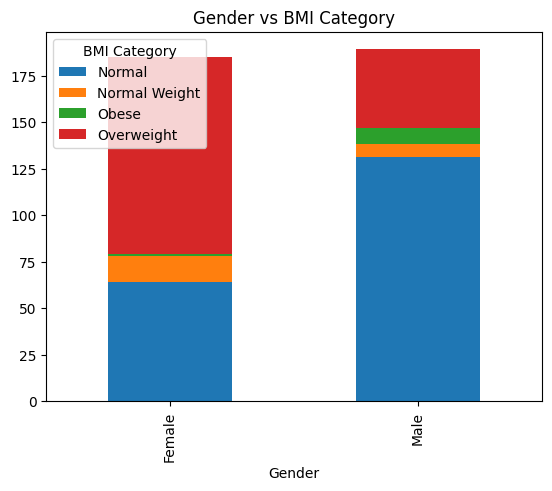

<Figure size 1000x400 with 0 Axes>

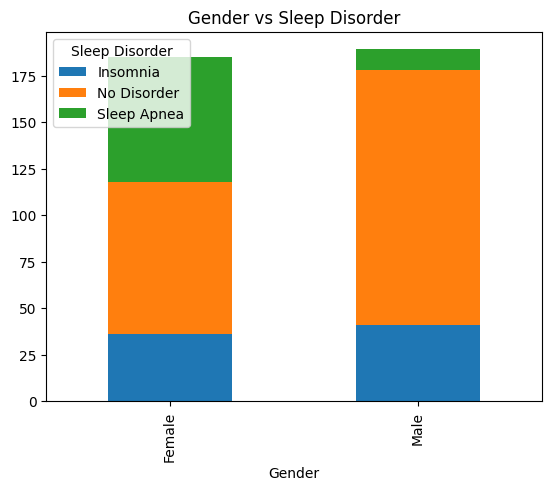

<Figure size 1000x400 with 0 Axes>

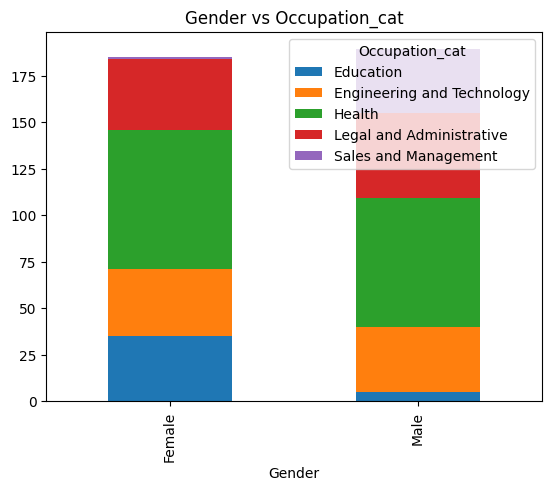

<Figure size 1000x400 with 0 Axes>

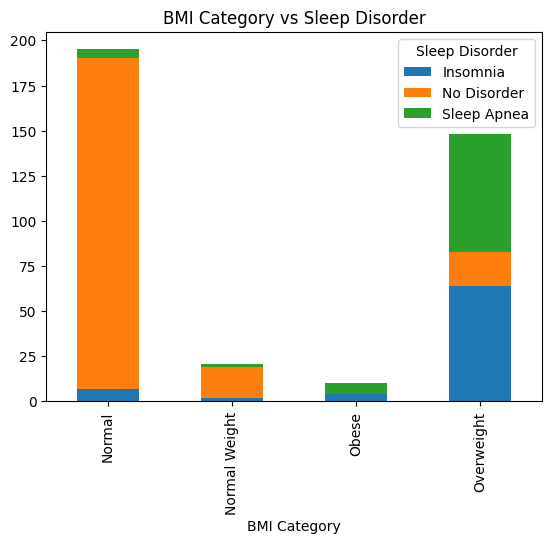

<Figure size 1000x400 with 0 Axes>

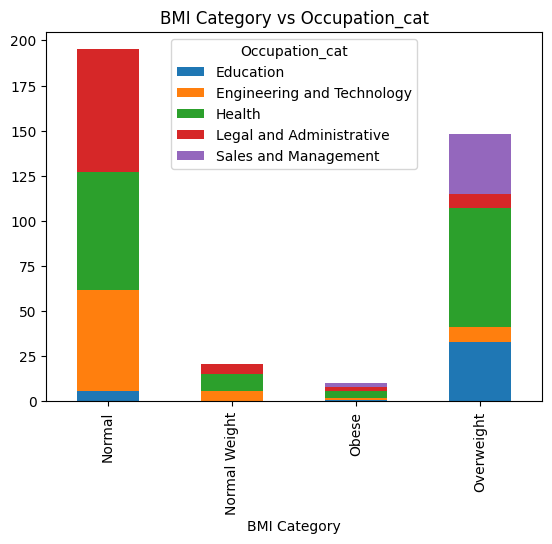

<Figure size 1000x400 with 0 Axes>

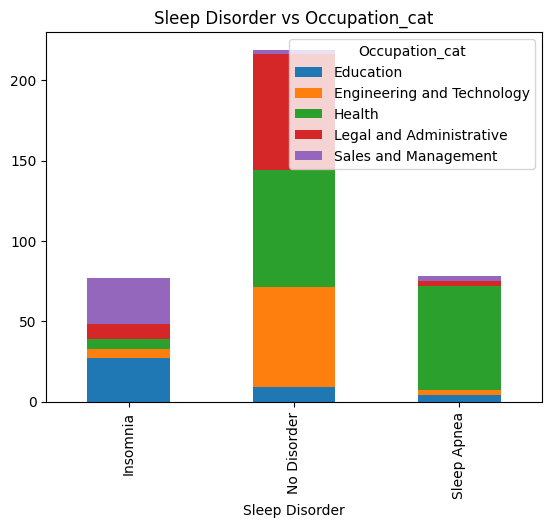

In [124]:
# Ver la relación entre las variables categóricas
def plot_cat_vs_cat(df):
    categorical_columns = df.select_dtypes(include='object').columns
    for i, cat_col1 in enumerate(categorical_columns):
        for cat_col2 in categorical_columns[i+1:]:
            plt.figure(figsize=(10, 4))
            contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
            contingency_table.plot(kind='bar', stacked=True)
            plt.title(f'{cat_col1} vs {cat_col2}')
            plt.show()
            
plot_cat_vs_cat(df_estres_clean)

### 1.4. Codificación de variables categóricas

En este apartado vamos a codificar las variables categóricas.

In [125]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

df_estres_clean['Gender'] = le.fit_transform(df_estres_clean['Gender'].values)
df_estres_clean['BMI Category'] = le.fit_transform(df_estres_clean['BMI Category'].values)
df_estres_clean['Sleep Disorder'] = le.fit_transform(df_estres_clean['Sleep Disorder'].values)
df_estres_clean['Occupation_cat'] = le.fit_transform(df_estres_clean['Occupation_cat'].values)

df_estres_clean.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_cat
0,1,27,6.1,6,42,6,3,1.52,77,4200,1,1
1,1,28,6.2,6,60,8,0,1.56,75,10000,1,2
2,1,28,6.2,6,60,8,0,1.56,75,10000,1,2
3,1,28,5.9,4,30,8,2,1.56,85,3000,2,4
4,1,28,5.9,4,30,8,2,1.56,85,3000,2,4


### 1.5. Dividimos el dataset en train y test

En este apartado vamos a dividir el dataset en train y test.

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_estres_clean.drop(columns=['Stress Level']),
    df_estres_clean['Stress Level'],
    test_size = 0.2,
    random_state = rn_state
)

### 1.6. Normalizamos los datos de entrenamiento y validación

En este apartado vamos a normalizar los datos de entrenamiento y validación.


In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 2. Modelos de Regrasión

### 2.1. Regresión Lineal

En este apartado vamos a entrenar un modelo de regresión lineal.

In [128]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression = linear_regression.fit(X_train_scaled, y_train)

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import numpy as np

y_predicted_train = linear_regression.predict(X_train_scaled)
print('Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted_train))
print('Mean squared error: %.2f' % mean_squared_error(y_train, y_predicted_train))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_train, y_predicted_train)))

Mean absolute error: 0.31
Mean squared error: 0.22
Root Mean squared error: 0.47


In [130]:
# Obtener los coeficientes del modelo
coef = linear_regression.coef_
intercept = linear_regression.intercept_

# Mostrar los coeficientes
for i, col in enumerate(X_train.columns):
    print(f'Coeficiente para {col}: {coef[i]}')

print(f'Intercepto: {intercept}')

Coeficiente para Gender: 0.34629890762115173
Coeficiente para Age: 0.5269278845316419
Coeficiente para Sleep Duration: -0.31153177210495786
Coeficiente para Quality of Sleep: -1.3698818856794606
Coeficiente para Physical Activity Level: -0.21066332469488852
Coeficiente para BMI Category: -0.48545574113370865
Coeficiente para Blood Pressure: -0.016294625834173203
Coeficiente para Heart Rate: 0.3058280736541346
Coeficiente para Daily Steps: 0.3998303347620243
Coeficiente para Sleep Disorder: 0.11462925793240039
Coeficiente para Occupation_cat: 0.11525100502405111
Intercepto: 5.31103678929766


In [133]:
print('Train Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted_train))
print('Train Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_train, y_predicted_train)))

y_predicted = linear_regression.predict(X_test_scaled)
print('Test Mean absolute error: %.2f' % mean_absolute_error(y_test, y_predicted))
print('Test Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_predicted)))

Train Mean absolute error: 0.31
Train Mean squared error: 0.47
Test Mean absolute error: 0.44
Test Mean squared error: 0.58


### 2.2. Regresión LASSO


In [134]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.01)
lasso_regression = lasso_regression.fit(X_train_scaled, y_train)

In [135]:
y_predicted_train_lasso = lasso_regression.predict(X_train_scaled)
print('Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted_train_lasso))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_train, y_predicted_train_lasso)))

y_predicted_lasso = lasso_regression.predict(X_test_scaled)
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_predicted_lasso))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_predicted_lasso)))

Mean absolute error: 0.32
Root Mean squared error: 0.47
Mean absolute error: 0.44
Root Mean squared error: 0.59


In [136]:
# Obtener los coeficientes del modelo
coef_lasso = lasso_regression.coef_
intercept_lasso = lasso_regression.intercept_

# Mostrar los coeficientes
for i, col in enumerate(X_train.columns):
    print(f'Coeficiente para {col}: {coef_lasso[i]}')

print(f'Intercepto: {intercept_lasso}')

Coeficiente para Gender: 0.3137279337610124
Coeficiente para Age: 0.437217512862142
Coeficiente para Sleep Duration: -0.2932616592903744
Coeficiente para Quality of Sleep: -1.3477279772410395
Coeficiente para Physical Activity Level: -0.15003828639519223
Coeficiente para BMI Category: -0.41060376035654467
Coeficiente para Blood Pressure: 0.005749282727362389
Coeficiente para Heart Rate: 0.28081921013560435
Coeficiente para Daily Steps: 0.3625557193614187
Coeficiente para Sleep Disorder: 0.11139708665283721
Coeficiente para Occupation_cat: 0.11678376565573022
Intercepto: 5.31103678929766


### 2.2. Regresión LASSO

En este apartado vamos a entrenar un modelo de regresión LASSO.